<a href="https://colab.research.google.com/github/noshitha4/CVIP-DataScience/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

import matplotlib.dates as mdates

from matplotlib.dates import DateFormatter

import plotly.express as px

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline



df = pd.read_csv("covid_19_india.csv")

df.head()



,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [5]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [6]:
df.shape

(806, 9)

In [7]:
df.isna().sum()

Sno                         5
Date                        5
Time                        5
State/UnionTerritory        5
ConfirmedIndianNational     5
ConfirmedForeignNational    5
Cured                       5
Deaths                      5
Confirmed                   5
dtype: int64

In [8]:
df.dtypes

Sno                         float64
Date                         object
Time                         object
State/UnionTerritory         object
ConfirmedIndianNational      object
ConfirmedForeignNational     object
Cured                       float64
Deaths                      float64
Confirmed                   float64
dtype: object

In [11]:
df['ConfirmedIndianNational'].value_counts()

-      355
1      108
3       73
2       33
4       21
      ... 
41       1
86       1
87       1
45       1
110      1
Name: ConfirmedIndianNational, Length: 62, dtype: int64

In [13]:
df = df.drop(['ConfirmedIndianNational','ConfirmedForeignNational', 'Sno', 'Time'], axis = 1)

df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0.0,0.0,1.0
1,31/01/20,Kerala,0.0,0.0,1.0
2,01/02/20,Kerala,0.0,0.0,2.0
3,02/02/20,Kerala,0.0,0.0,3.0
4,03/02/20,Kerala,0.0,0.0,3.0


In [14]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', nan], dtype=object)

In [18]:
def drop_star(df):

  for i in df['State/UnionTerritory'].iteritems():

    if i[1][-3:] == "***":

      df.drop(i[0],inplace=True)

      drop_star(df)

df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', nan], dtype=object)

In [19]:
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

df['States'] = df['States'].replace(['Maharashtra'],'MH')

df['States'] = df['States'].replace(['Kerala'],'KL')

df['States'] = df['States'].replace(['Karnataka'],'KA')

df['States'] = df['States'].replace(['Tamil Nadu'],'TN')

df['States'] = df['States'].replace(['Andhra Pradesh'],'AP')

df['States'] = df['States'].replace(['Uttar Pradesh'],'UP')

df['States'] = df['States'].replace(['Madhya Pradesh'],'MP')

df['States'] = df['States'].replace(['Karanataka'],'KA')

df['States'] = df['States'].replace(['West Bengal'],'WB')

df['States'] = df['States'].replace(['Himachal Pradesh'],'HP')

df['States'] = df['States'].replace(['Jammu and Kashmir'],'JNK')

df['States'].unique()



array(['KL', 'Telengana', 'Delhi', 'Rajasthan', 'UP', 'Haryana', 'Ladakh',
       'TN', 'KA', 'MH', 'Punjab', 'JNK', 'AP', 'Uttarakhand', 'Odisha',
       'Puducherry', 'WB', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'HP',
       'MP', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', nan], dtype=object)

In [22]:
df_latest = df[df['Date']=="2021-08-11"]

df_latest.head()

,Date,States,Cured,Deaths,Confirmed


In [24]:
df_latest['Confirmed'].sum()

0.0

In [26]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])

df['%Cured']=(df['Cured']/df['Confirmed'])*100

df['%Deaths']=(df['Deaths']/df['Confirmed'])*100

df_latest = df_latest.sort_values(by=['Confirmed'], ascending = False)

df_latest.head(10)

,Date,States,Cured,Deaths,Confirmed


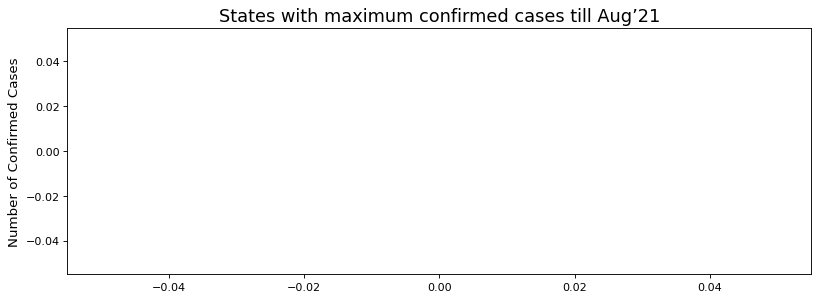

In [27]:
df_latest = df_latest.sort_values(by=['Confirmed'], ascending = False)

plt.figure(figsize=(12,4), dpi=80)

plt.bar(df_latest['States'][:10], df_latest['Confirmed'][:10],

align='center',color='blue')

plt.ylabel('Number of Confirmed Cases', size = 12)

plt.title("States with maximum confirmed cases till Aug’21", size = 16)

plt.show()

In [28]:
df2= df_latest.copy()

df_Top= df2.head(10)

df_Top.style.background_gradient(cmap='Reds')

,Date,States,Cured,Deaths,Confirmed
